# Clustering Algorithms (20 points) [TA: Vodelina Samatova]

In this exercise, you'll be working on different clustering algorithms: KMeans and Hierarchical Clustering Algorithms.   


In [1]:
import numpy as np
np.random.seed(23)
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

data_folder = 'data'

Dataset 1 is of dimension (200, 2)
Dataset 2 is of dimension (200, 2)
Dataset 3 is of dimension (200, 2)


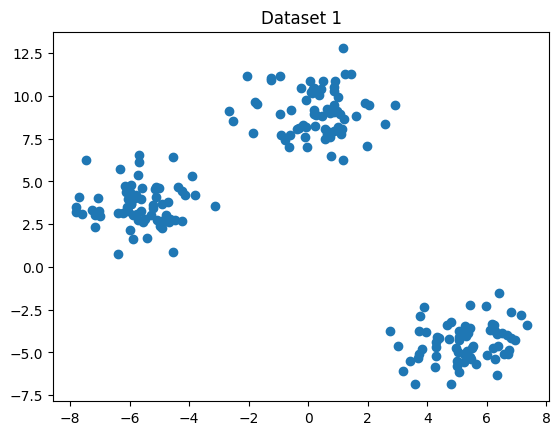

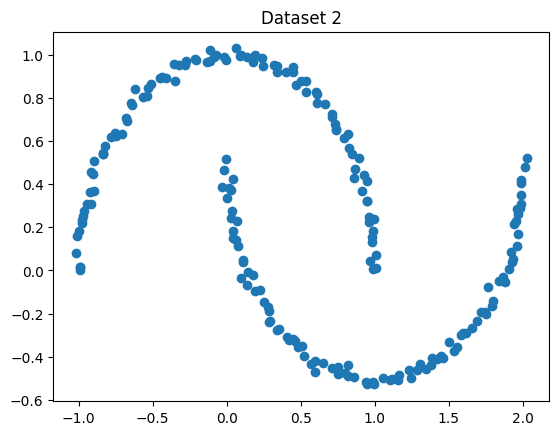

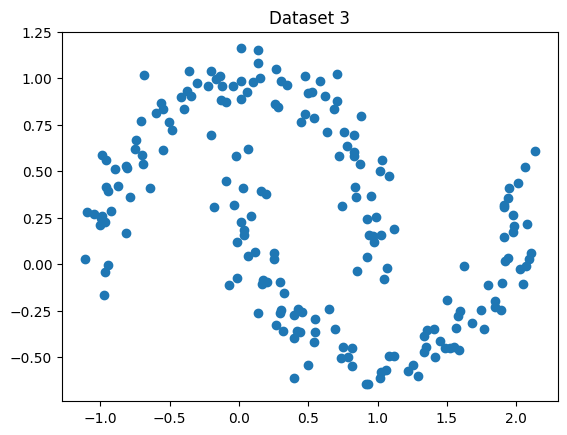

In [2]:
# First, let us load datasets to use for KMeans and Hierarchical Clustering
d1 = np.load(f'{data_folder}/hw4-p1-d1.npz')
dataset_1 = d1['data']
print(f'Dataset 1 is of dimension {dataset_1.shape}')
initial_centers = d1['initial']

d2 = np.load(f'{data_folder}/hw4-p1-d2.npz')
dataset_2 = d2['data']
print(f'Dataset 2 is of dimension {dataset_2.shape}')
initial_centers = d2['initial']

d3 = np.load(f'{data_folder}/hw4-p2-d2.npz')
dataset_3 = d3['data']
print(f'Dataset 3 is of dimension {dataset_2.shape}')

# plot the data 
plt.scatter(x = dataset_1[:, 0], y=dataset_1[:, 1])
plt.title('Dataset 1')
plt.show()

plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1])
plt.title('Dataset 2')
plt.show()

plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1])
plt.title('Dataset 3')
plt.show()

# Problem 1.1: Cluster SSE

In [3]:
def alda_calculate_sse(data, cluster_assignments):
    """
    TODO: Write code to calculate the SSE for the dataset 'data' given cluster assignments. Code should be written from
    scratch, not use an existing sklearn library to do so (numpy is allowed to use).
    
    INPUT:
          data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
          cluster_assignments: a numpy integer vector containing the cluster assignments for each point in data.
                           It is of shape (n_attributes, ).
          
    OUTPUT:
          A floating point value containing the SSE
    
    Allowed functions: numpy mathematical functions
    """
    # Identify the unique clusters
    unique_clusters = np.unique(cluster_assignments)
    
    # Initialize SSE to zero
    sse = 0.0
    
    # Iterate over each cluster to calculate the SSE
    for cluster in unique_clusters:
        # Get the indices of points in the current cluster
        cluster_indices = np.where(cluster_assignments == cluster)[0]
        
        # Get the points belonging to the current cluster
        cluster_points = data[cluster_indices]
        
        # Calculate the centroid of the current cluster
        centroid = np.mean(cluster_points, axis=0)
        
        # Calculate the squared differences between each point and the centroid
        squared_diffs = np.sum((cluster_points - centroid) ** 2, axis=1)
        
        # Sum the squared differences to the SSE
        sse += np.sum(squared_diffs)
    
    return sse
     

For given data, SSE = 5.0


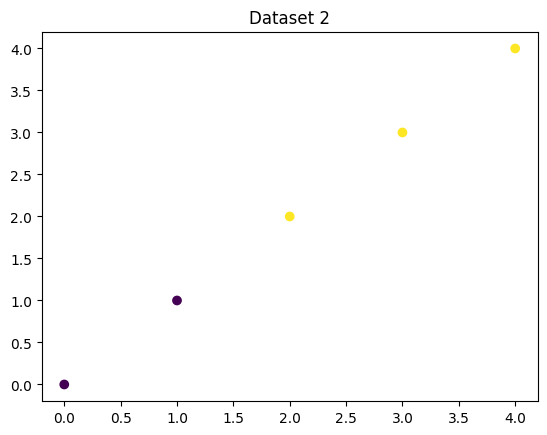

In [4]:
# Test your code!
# assume we're creating a dataset with two clusters 
practice_data = np.array([[0, 0], [1, 1], [2, 2], [3, 3] ,[4, 4]])
# here, 0 means that all points belong to cluster 0
# 1 means all points belong to cluster 1
practice_cluster_assignments = np.array([0, 0, 1, 1, 1]) 

# Let's calculate its SSE
print(f'For given data, SSE = {alda_calculate_sse(practice_data, practice_cluster_assignments)}')
# should be 5

plt.scatter(x = practice_data[:, 0], y=practice_data[:, 1], c=practice_cluster_assignments)
plt.title('Dataset 2')
plt.show()

In [5]:
# Let us evaluate the function on the practice dataset 
practice_ds = np.load(f'{data_folder}/hw4-p1-practice.npz')
practice_data = practice_ds['data']
practice_initial_centers = practice_ds['initial']
practice_sse = alda_calculate_sse(practice_data, practice_initial_centers)
np.testing.assert_almost_equal(practice_sse, 2554.26922225574)

In [ ]:
# Remember, we will have hidden tests as well!

# Problem 1.2: K-Means Clustering

In this problem, you will be using the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) sklearn **library**,  to perform k-means clustering.

In [6]:
def alda_kmeans(data, k, initial_centers, max_iter):
    """
    TODO: Write code to perform k-means clustering on the data matrix given by the 'data' variable using the kmeans. 
    
    INPUT:
        data: A 2D numpy array of shape (n_samples, n_attributes) where n_samples is the number of samples
              and n_attributes is the number of attributes for each data point.
        k: An integer, gives the number of clusters to calculate in kmeans
        initial_centers: A numpy array of shape (k, n_attributes) containing the initial centers
        max_iter: max. number of iterations to run for k-means
    
    OUTPUT:
        A numpy ndarray of shape (n_samples, ) providing the cluster assignments
        Cluster assignment values range between 0 and k-1.
    
    NOTE 1: Scikit-learn KMeans Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    NOTE 2: For reproducibility, use the initial_centers variable for the init agrument in KMeans, 
            specifying initial centers; you'll also have to set n_init = 1 to remove any warnings.
    """
    # Create KMeans instance with the given parameters
    kmeans = KMeans(n_clusters=k, init=initial_centers, max_iter=max_iter, n_init=1, random_state=23)
    
    # Fit the model to the data
    kmeans.fit(data)
    
    # Return the cluster assignments
    return kmeans.labels_

In [7]:
# Test your code!
# let us initialize some variables first
practice_k = 2 # to represent number of clusters

practice_ds = np.load(f'{data_folder}/hw4-p1-practice.npz')
# the dataset is stored here
practice_data = practice_ds['data']
# initial cluster assignments are stored in this variable
# We use these to ensure a deterministic answer (for testing purposes)
practice_initial_assignments = practice_ds['initial']
# calculate initial centers
practice_centers = []
for practice_c in np.unique(practice_initial_assignments):
    p_current_cluster_data = practice_data[practice_initial_assignments == practice_c, : ]
    p_current_cluster_centers = np.mean(p_current_cluster_data, axis=0)
    practice_centers.append(p_current_cluster_centers)

# convert practice_centers to a numpy array 
practice_centers = np.array(practice_centers)

# call kmeans
practice_assignments = alda_kmeans(data=practice_data, k=practice_k,\
                                       initial_centers=practice_centers, max_iter=2)

print(f'SSE of KMeans on practice dataset is \
{alda_calculate_sse(practice_data, practice_assignments)}') # Should be ~ 133.045

SSE of KMeans on practice dataset is 133.04517089872647


In [8]:
# Public Test Cases
# let us initialize some variables first
test_k = 3 # to represent number of clusters

test_ds = np.load(f'{data_folder}/hw4-p1-d1.npz')
# the dataset is stored here
test_data = test_ds['data']
# initial cluster assignments are stored in this variable
test_initial_assignments = test_ds['initial']

# calculate initial centers
test_centers = []
for test_c in np.unique(test_initial_assignments):
    test_cluster_data = test_data[test_initial_assignments == test_c, : ]
    test_cluster_centers = np.mean(test_cluster_data, axis=0)
    test_centers.append(test_cluster_centers)

# convert practice_centers to a numpy array 
test_centers = np.array(test_centers)

# call kmeans
test_assignments = alda_kmeans(data=test_data, k=test_k,\
                                       initial_centers=test_centers, max_iter=4)


np.testing.assert_almost_equal(alda_calculate_sse(test_data, test_assignments), 529.2865169916909)

In [ ]:
# Remember, we will have hidden test cases too

Below, we have some code to visualize your k-means clustering on the three toy datasets:

In [9]:
def kmeans(k,ds, title='Plot'):
    # the dataset is stored here
    data = ds['data']
    # initial cluster assignments are stored in this variable
    initial_assignments = ds['initial']

    # calculate initial centers
    centers = []
    for c in np.unique(initial_assignments):
        cluster_data = data[initial_assignments == c, : ]
        cluster_centers = np.mean(cluster_data, axis=0)
        centers.append(cluster_centers)

    # convert practice_centers to a numpy array 
    centers = np.array(centers)
    assignment = alda_kmeans(data=data, k=k, initial_centers=centers, max_iter=300)

    plt.scatter(x = data[:, 0], y=data[:, 1], c=assignment)
    plt.title(title)
    plt.show()

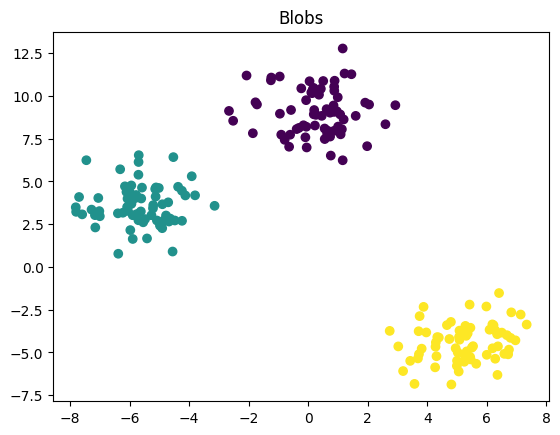

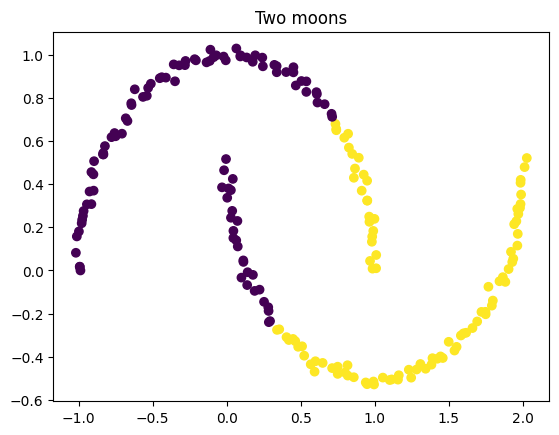

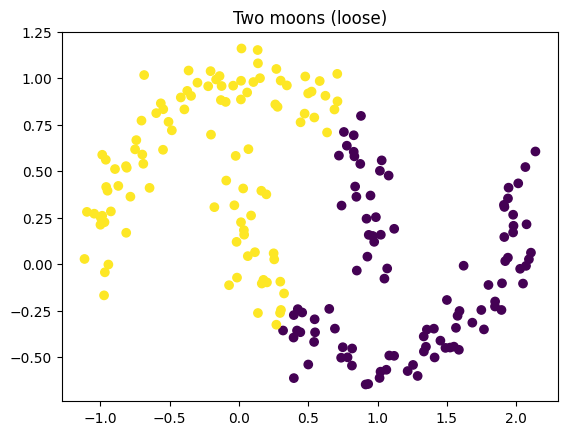

In [10]:
ds1 = np.load(f'{data_folder}/hw4-p1-d1.npz')
assignment1 = kmeans(3,ds1, 'Blobs')
ds2 = np.load(f'{data_folder}/hw4-p1-d2.npz')
assignment2 = kmeans(2,ds2, 'Two moons')
ds3 = np.load(f'{data_folder}/hw4-p2-d2.npz')
assignment3 = kmeans(2,ds3, 'Two moons (loose)')

## 1.2.1: k-means++ (Example)

[k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B) is a clustering algorithm with the optimized centroids initialization, fortunately, the built-in [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) function in sklearn applied k++ centroid initialization as a default, we will compare how many iterations are required to get convergence with and without using k++ algorithm.

In [11]:
def kmeans_kplusplus(k,ds):
    # the dataset is stored here
    data = ds['data']
    kmeans = KMeans(n_clusters=k, n_init=1, max_iter=300, verbose=1)
    return kmeans.fit(data).labels_

********************  See how many iterations are required without k++ initialization  ********************


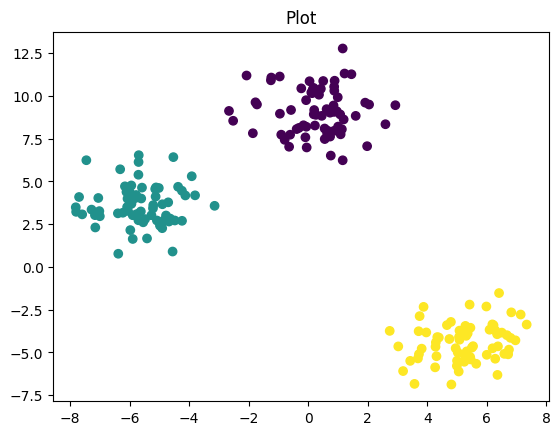

********************  See how many iterations are required with k++ initialization  ********************
Initialization complete
Iteration 0, inertia 1092.296017621429.
Iteration 1, inertia 529.2865169916906.
Converged at iteration 1: strict convergence.


In [12]:
print('*'*20 + "  See how many iterations are required without k++ initialization  " + '*'*20)
assignment_without_kplusplus = kmeans(3,ds1)
print('*'*20 + "  See how many iterations are required with k++ initialization  " + '*'*20)
assignment_with_kplusplus = kmeans_kplusplus(3,ds1)

# 1.3. Agglomerative/Hierarchical Clustering

You need to implement the same function, agglomerative clusting using the [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) library from sklearn.

In [13]:
def alda_agglomerative(data, k, linkage):
    """
    TODO: Perform agglomerative clustering on the data from the 'data' variable. Type of linkage is 
    specified by 'linkage'
    INPUT:
         data: A 2D numpy array of shape (n_samples, n_attributes) where n_samples is the number of samples
              and n_attributes is the number of attributes for each data point.
         k: An integer, gives the number of clusters to calculate 
         linkage: A string, can be one of the three: 'single', 'complete', 'average'
         
    OUTPUT:
         A numpy ndarray of shape (n_samples, ) providing the cluster assignments. 
         Cluster assignment values range between 0 and k-1.
    
         
    """     
    # Create AgglomerativeClustering instance with the given parameters
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    
    # Fit the model to the data and obtain cluster labels
    cluster_assignments = agglomerative.fit_predict(data)
    
    # Return the cluster assignments
    return cluster_assignments

SSE of agglomerative clustering with complete linkage is 81.53911094739291


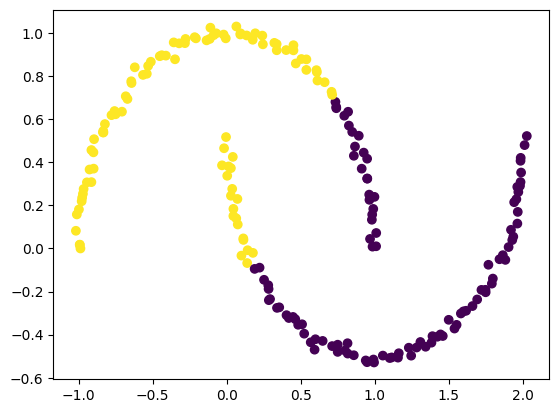

In [14]:
# Test your code!
# let us initialize some variables first
practice_k = 2 # to represent number of clusters

practice_ds = np.load(f'{data_folder}/hw4-p1-d2.npz')
# the dataset is stored here
practice_data = practice_ds['data']

# perform hierarchical clustering using complete linkage
linkage_type = 'complete'
practice_cluster_assignments = alda_agglomerative(practice_data, practice_k, linkage_type)

print(f'SSE of agglomerative clustering with {linkage_type} linkage \
is {alda_calculate_sse(practice_data, practice_cluster_assignments)}') # Should be ~ 81.539

# plot the cluster assignments
plt.scatter(practice_data[:, 0], practice_data[:, 1], c=practice_cluster_assignments)


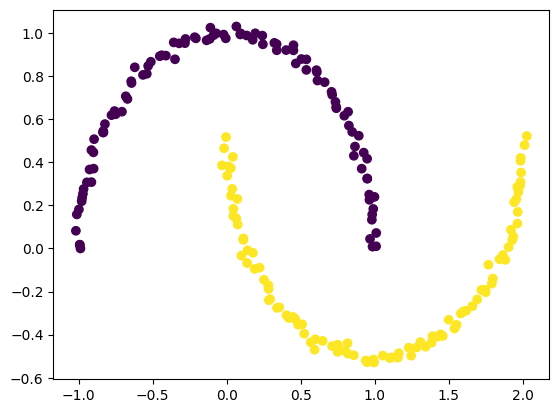

In [15]:
# Public Tests
test_k = 2 # to represent number of clusters

test_ds = np.load(f'{data_folder}/hw4-p1-d2.npz')
# the dataset is stored here
test_data = test_ds['data']

# perform hierarchical clustering using single linkage
linkage_type = 'single'
test_cluster_assignments = alda_agglomerative(test_data, test_k, linkage_type)

np.testing.assert_almost_equal(alda_calculate_sse(test_data, test_cluster_assignments), 121.76952070250866)

# plot the clusters
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_cluster_assignments)


In [ ]:
# Remember, we'll have hidden test cases too

### 1.3.1: Dendrogram

SKlearn doesn't have a built-in method for dendograms, so we'll be using [scipy's dendrogram tool](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

Let's try the dendrogram on the `dataset_2` we had above.

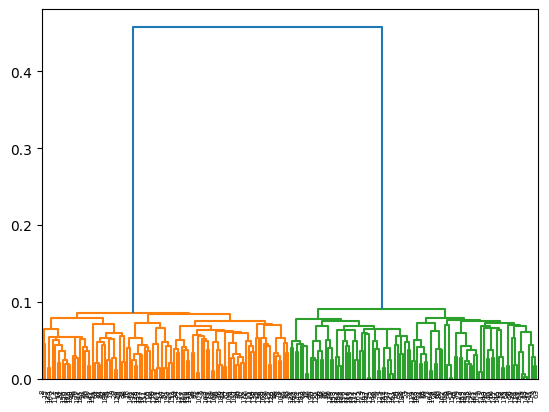

In [16]:
import scipy.cluster.hierarchy as hierarchy

# Note the method='single'
single_link = hierarchy.linkage(dataset_2, method='single')
hierarchy.dendrogram(single_link)
plt.show()

Now, using the same logic as the above code, implement the complete-link dendrogram.

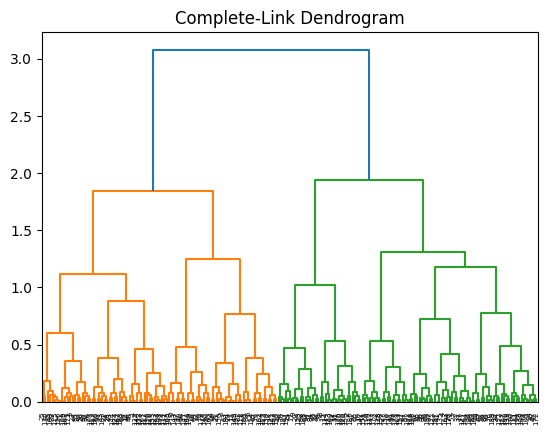

In [17]:
# Note that it is REQUIRED to use complete_link_clustering and dendrogram 
# variables names when creating your clustering and dendrogram

#TODO: implement the complete-link dendrogram

complete_link_clustering = None
dendrogram = None
# Perform complete-link clustering
complete_link_clustering = hierarchy.linkage(dataset_2, method='complete')

# Create the dendrogram using the complete-link clustering result
dendrogram = hierarchy.dendrogram(complete_link_clustering)

plt.title('Complete-Link Dendrogram')
plt.show()

In [18]:
np.testing.assert_almost_equal(dendrogram['icoord'][5][2],34.375)
np.testing.assert_almost_equal(complete_link_clustering[24][2],0.017184987030773195)

### Interpreting the dendrograms

By looking at the dendrograms, what **difference** do you see between single-link clustering and complete-link? Which one has performed better?

### Answer here

Single-link clustering is more prone to chaining. It links clusters based on the closest pair of points, which can lead to elongated, "chain-like" clusters. 

Complete-link clustering tends to form more compact clusters by considering the farthest distance between points in different clusters.

From the dendrograms, Complete-Link Clustering provides better-defined clusters in this context. The clear separation between the two main clusters, as seen in the right dendrogram, suggests that the complete-link method has successfully formed distinct groups.

# 1.4. DBSCAN
Now we'll look at a dataset where neither K-means nor Agglomerative Clustering does well.

### Example 4.1: Limitations of k-means and hierarchical clustering
First, let's take another look at the scatter plot of `dataset_3`.

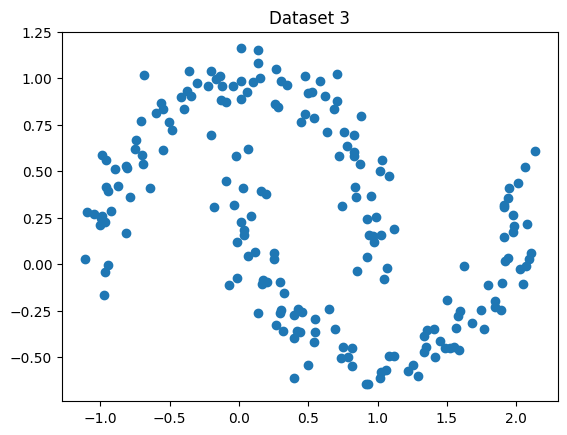

In [19]:
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1])
plt.title('Dataset 3')
plt.show()

#### Trying K-means
Let's try a K-means on this dataset with `n_clusters=2` and the rest of the same paramaters used previously.

Initialization complete
Iteration 0, inertia 217.55746361833144.
Iteration 1, inertia 177.80209486942005.
Iteration 2, inertia 176.53842987418537.
Iteration 3, inertia 169.3523657629441.
Iteration 4, inertia 128.5591345821709.
Iteration 5, inertia 92.5152743475302.
Iteration 6, inertia 87.0563223519566.
Iteration 7, inertia 86.48720053853245.
Iteration 8, inertia 86.4672626782006.
Converged at iteration 8: strict convergence.


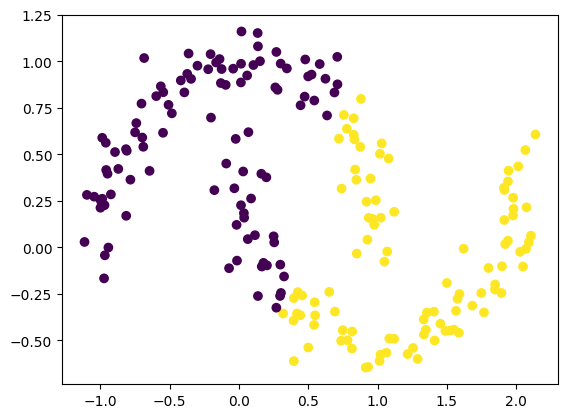

In [20]:
# Try K-means
kmeans = KMeans(n_clusters=2, init='random', n_init=1, max_iter=10, verbose=1)
results = kmeans.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

#### Trying Agglomerative
Now let's try a agglomerative clustering on this dataset with `n_clusters=2`. Try it with both `complete` and `single` linkage.

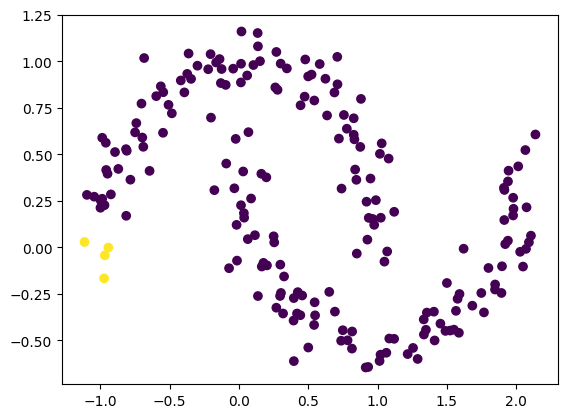

In [21]:
# Try agglomerative clustering
agglom = AgglomerativeClustering(n_clusters=2, linkage="single")
results = agglom.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

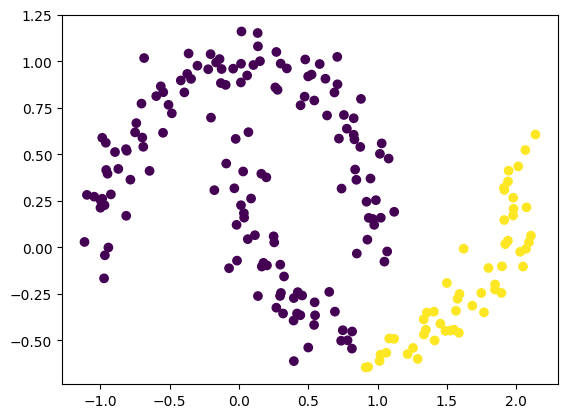

In [22]:
# Try agglomerative clustering
agglom = AgglomerativeClustering(n_clusters=2, linkage="complete")
results = agglom.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

Now is the time to try DBScan on `dataset_3`. Will it make better clusters? We don't know! Let's see

### Problem 1.4.1: DBSCAN

Finding the right number for `eps` and `min_samples` (min points) can be a bit touchy. **A good rule of thumb is to choose `min_samples` to be TWICE the dimension of the feature space.**

As the first step, complete the function `plot_dbscan`. The goal is to have a function which gets `epsilon` and `min_samples` and performs DBScan clustering on `dataset_3`. Using [the sklearn documentation for DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) can be so helpful.

In [30]:
from sklearn.cluster import DBSCAN

#TODO: complete the following function
def plot_dbscan(epsilon, min_samples):
    # Output:
    #   clustering: a fitted instance of DBScan clustering
    #   plt.scatter: scatter plot of DBScan
    x = dataset_3[:, 0]
    y = dataset_3[:, 1]
    clustering = None
    clustering = DBSCAN(eps=epsilon, min_samples=min_samples).fit(dataset_3)


    
    return clustering, plt.scatter(x=x, y=y, c=clustering.labels_)

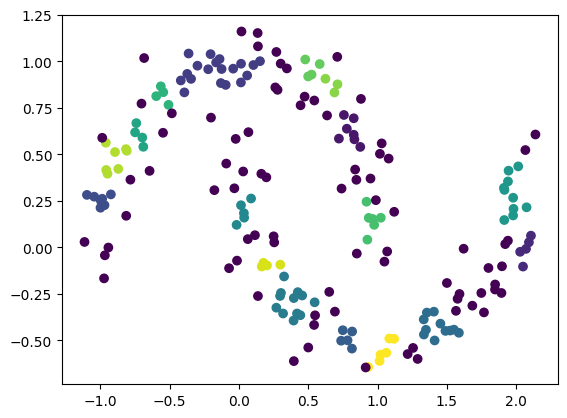

In [31]:
np.testing.assert_almost_equal(plot_dbscan(0.1, 4)[0].labels_[5],-1)

Now let's play around with different epsilons and see how it affects the result of DBScan clustering. What version of eps worked best for you?

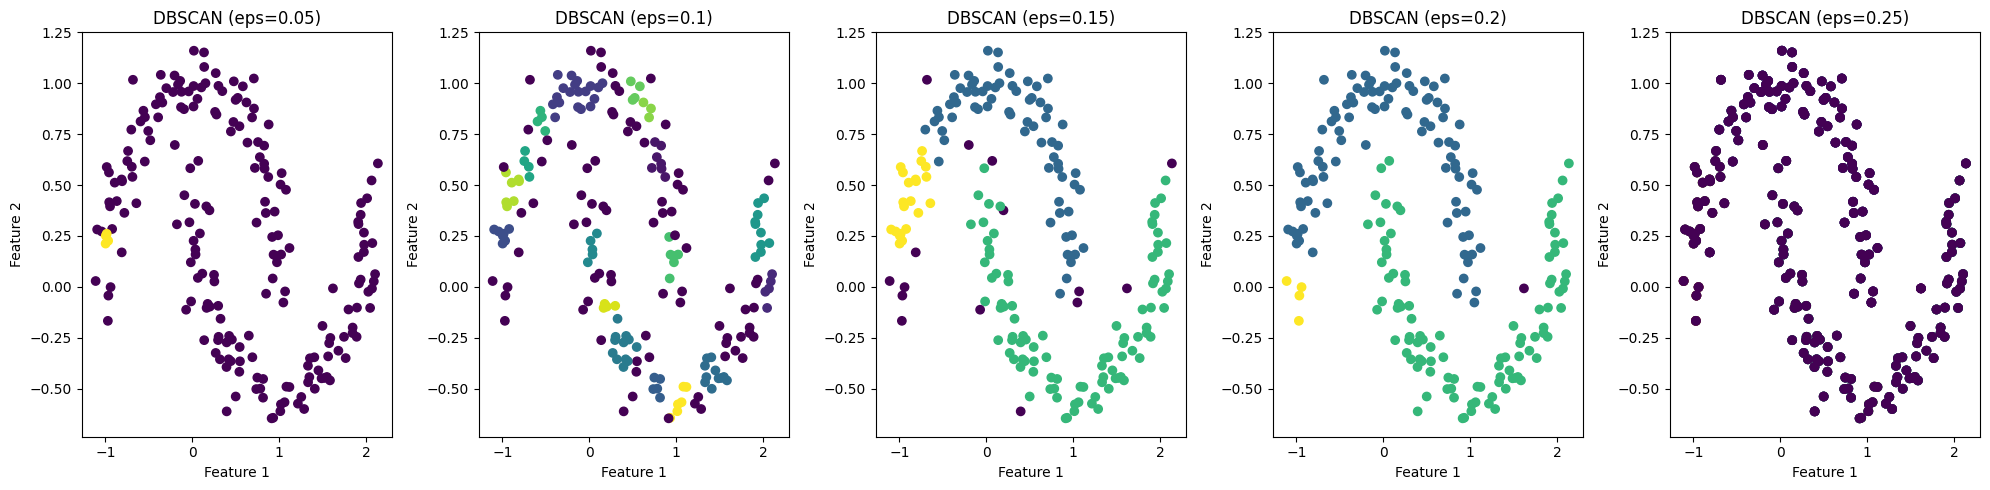

In [46]:
# Since we're in two-dimensional space, we will set min points as 2*2=4
min_pts = 4

#Try with different eps from 0.05 to 0.25
#plot_dbscan(0.25, min_pts)

eps_values = [0.05, 0.1, 0.15, 0.2, 0.25]

# Set up the plot for multiple DBSCAN results
fig, axes = plt.subplots(1, len(eps_values), figsize=(20, 5))

# Loop through different eps values and plot the clustering result
for i, eps in enumerate(eps_values):
    clustering = plot_dbscan(eps, min_pts)[0]
    axes[i].scatter(dataset_3[:, 0], dataset_3[:, 1], c=clustering.labels_)
    axes[i].set_title(f'DBSCAN (eps={eps})')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

# Display the figure
plt.tight_layout()
plt.show()

What value of eps worked best? How does eps affect your clustering? ANSWER HERE


Small eps (e.g., 0.05): The clusters are very fragmented, with many points marked as noise (label -1), indicating that eps is too restrictive.

For eps grow to 0.1, The clustering result shows multiple distinct clusters, but with several small groups and scattered points.

Moderate eps (0.15 - 0.2): The clusters are distinct, capturing the spiral pattern well with minimal noise. This range appears to provide the best representation of the data's inherent structure.

Large eps (e.g., 0.25): The clustering becomes too broad, with many points merged together into one large cluster, losing the separation between different structures.

In conclusion, the value of eps that worked best appears to be around 0.15 or 0.2. At these values, the clusters are well separated, and the points are grouped cohesively without excessive noise or too many small clusters.

### Problem 1.4.2: Finding a Reasonable Value for Epsilon in DBSCAN
In the real world, we cannot find a good epsilon based on guessing. So we'll be using the method discussed in class to determine a good `eps` for a given `min_samples`. That is, if `min_samples=k`, plot the distance from each point to its kth nearest neighbor. Then, sort those distances and plot them. Finally, locate on the graph where the sharpest change begins, and use that distance as your `eps`. You might have to play with values near that to get a good clustering.

Text(0, 0.5, 'Distance to 4th Nearest Neighbor')

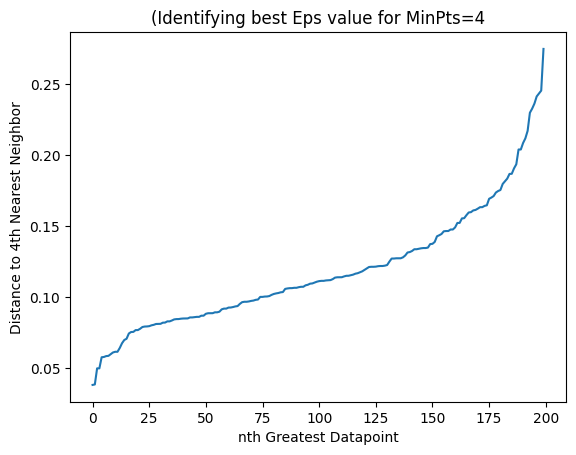

In [47]:
from sklearn.neighbors import NearestNeighbors

#Get the nearest neighbors
# the reason why we set min_pts as 4 is discussed above
min_pts = 4
neighbors = NearestNeighbors(n_neighbors=min_pts).fit(dataset_3)
distances, indices = neighbors.kneighbors(dataset_3)
#Sort them
dis_to_nth_nn = sorted(distances[:,min_pts-1])
#Plot
plt.plot(dis_to_nth_nn)
plt.title(f'(Identifying best Eps value for MinPts={min_pts}')
plt.xlabel("nth Greatest Datapoint")
plt.ylabel(f'Distance to {min_pts}th Nearest Neighbor')

As we can see, the sharpest cange begins at around the 175th greatest datapoint, which corresponds to a value of around `0.15`. So that can serve as a starting point for trying out different `eps` values.

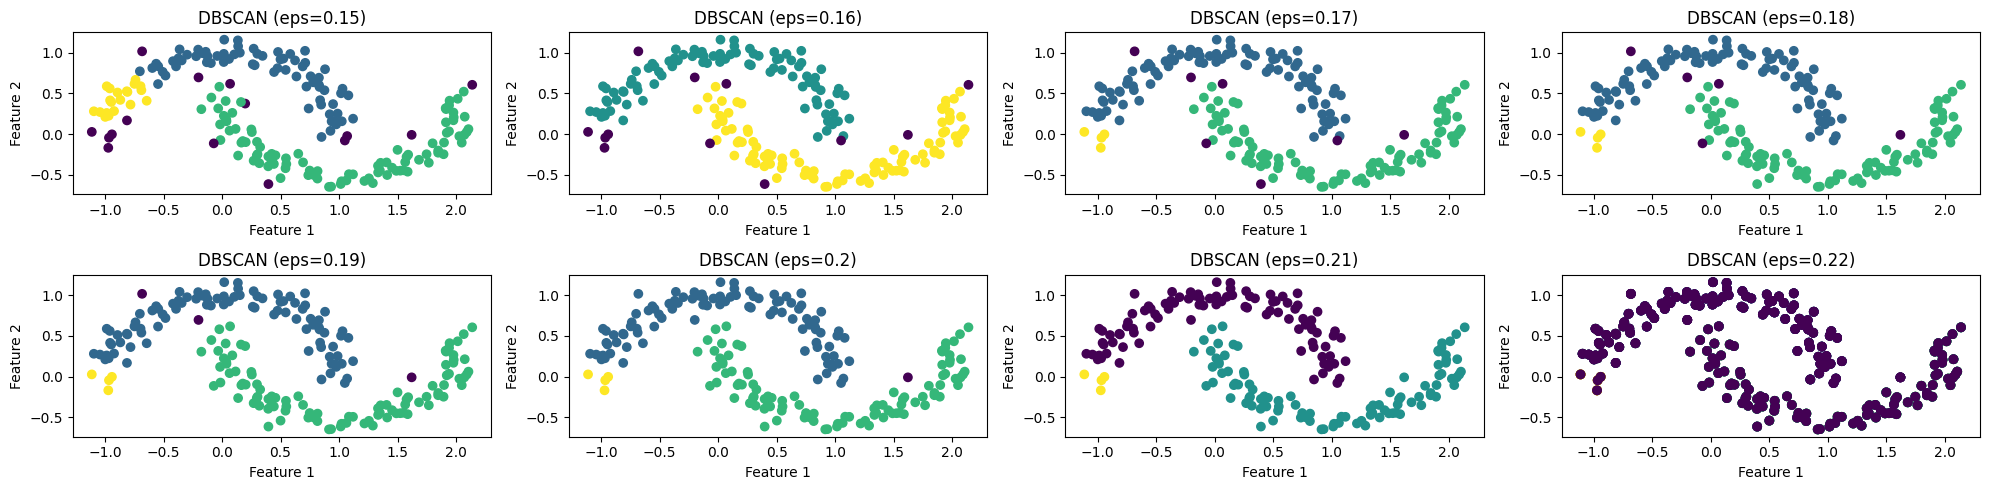

In [53]:
# Now try different eps from 0.15-0.22. 0.21 seems to be the best

# plot_dbscan(0.15, min_pts)

eps_values = [0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22]

# Set up the plot for multiple DBSCAN results
fig, axes = plt.subplots(2, len(eps_values)//2, figsize=(20, 5))

# Loop through different eps values and plot the clustering result
for i, eps in enumerate(eps_values):
    clustering = plot_dbscan(eps, min_pts)[0]
    axes[i // (len(eps_values)//2), i % (len(eps_values)//2)].scatter(dataset_3[:, 0], dataset_3[:, 1], c=clustering.labels_)
    axes[i // (len(eps_values)//2), i % (len(eps_values)//2)].set_title(f'DBSCAN (eps={eps})')
    axes[i // (len(eps_values)//2), i % (len(eps_values)//2)].set_xlabel('Feature 1')
    axes[i // (len(eps_values)//2), i % (len(eps_values)//2)].set_ylabel('Feature 2')

# Display the figure
plt.tight_layout()
plt.show()

As you can see, for some datasets, the output of DBScan can be way more acceptable than k-means and hierarchical clustering. We just have to find good values of epsilon and min_samples.